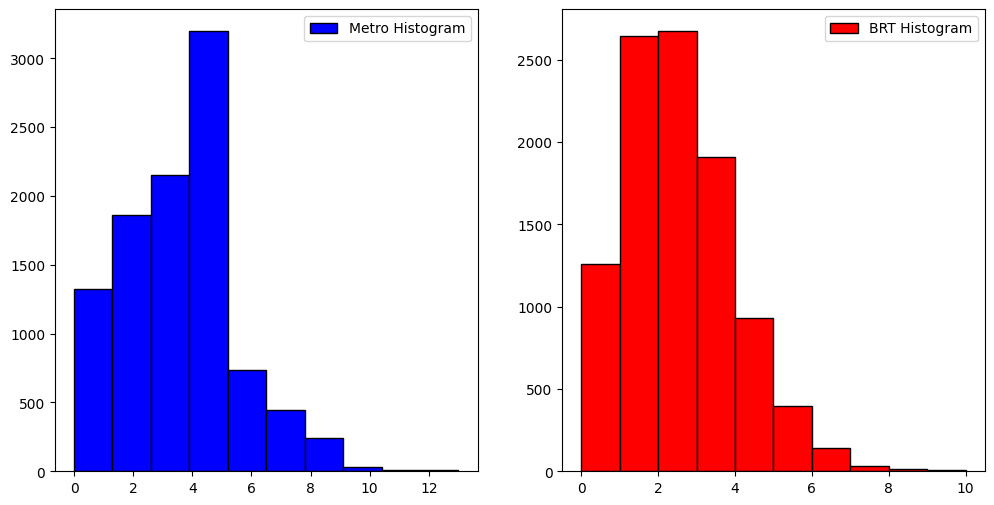

In [6]:
#part_1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import binom
df = pd.read_csv('./Tarbiat.csv')
metro = df["metro"].to_numpy()
brt = df["BRT"].to_numpy()
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(metro, color="blue", edgecolor="black", bins = 10, label= "Metro Histogram")
plt.legend()
plt.subplot(122)
plt.hist(brt, color="red", edgecolor="black", bins = 10, label= "BRT Histogram")
plt.legend()
plt.show()

In [7]:
#part_2
metro_lambda = df["metro"].mean()
brt_lambda = df["BRT"].mean()
print(f"X lambda = {metro_lambda:.6f}")
print(f"Y lambda = {brt_lambda:.6f}")

X lambda = 3.531600
Y lambda = 2.063600


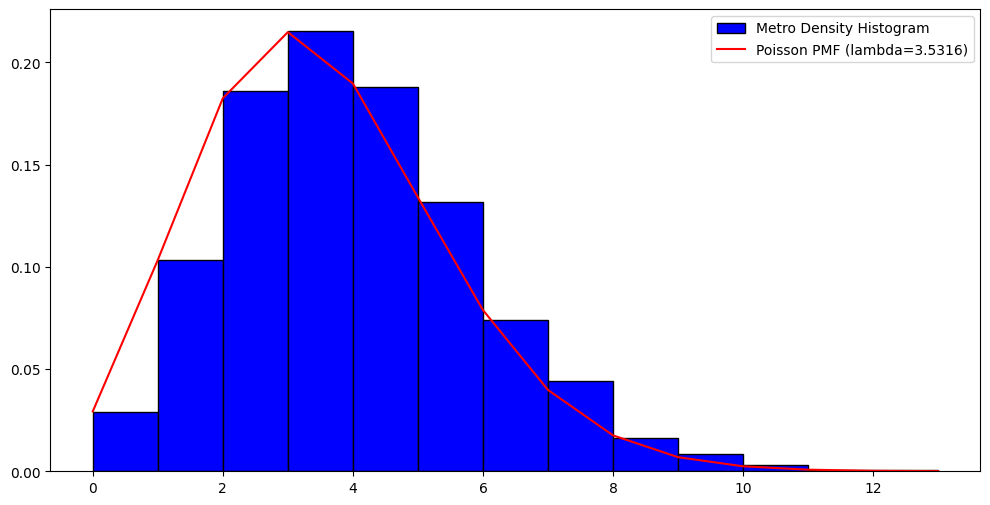

In [8]:
#part_3_4
x_axis = np.arange(min(metro), max(metro) + 1)
poisson_pmf = poisson.pmf(x_axis, metro_lambda)
plt.figure(figsize=(12,6))
plt.hist(metro, bins = 13, density=True, color="blue", edgecolor="black", label= "Metro Density Histogram")
plt.plot(x_axis, poisson_pmf, color = "red", label=f"Poisson PMF (lambda={metro_lambda})")
plt.legend()
plt.show()

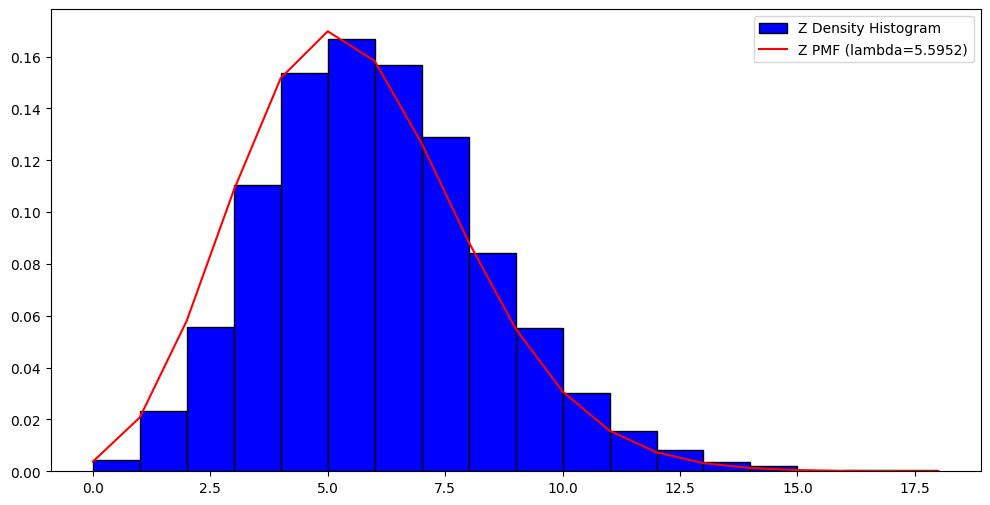

In [9]:
#part_5
z_lambda = brt_lambda + metro_lambda
z = metro + brt
x_axis = np.arange(min(z), max(z) + 1)
poisson_pmf = poisson.pmf(x_axis, z_lambda)
plt.figure(figsize=(12,6))
plt.hist(z, bins = 18, density=True, color="blue", edgecolor="black", label= "Z Density Histogram")
plt.plot(x_axis, poisson_pmf, color = "red", label=f"Z PMF (lambda={z_lambda})")
plt.legend()
plt.show()

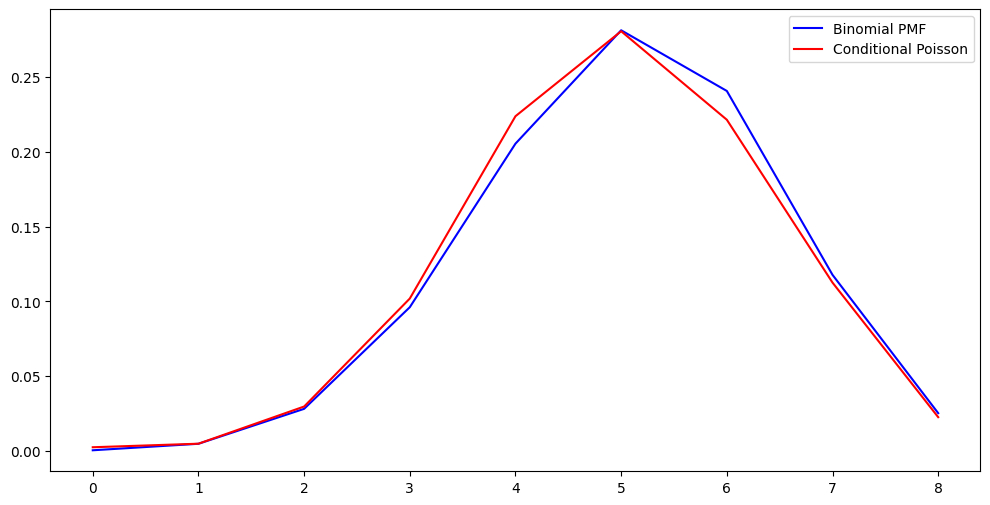

In [10]:
#part_6_7_8
n = 8
p = metro_lambda / z_lambda
x_axis = np.arange(0, n + 1)
bino_pmf = binom.pmf(x_axis ,n, p)
bino_probs = [0] * (n+1)
for i in range(len(z)):
    if z[i] == n:
        bino_probs[metro[i]] += 1
sum_all = sum(bino_probs)
for i in range(len(bino_probs)):
    bino_probs[i] /= sum_all
plt.figure(figsize=(12,6))
plt.plot(x_axis, bino_pmf ,color="blue", label= "Binomial PMF")
plt.plot(x_axis, bino_probs, color = "red", label="Conditional Poisson")
plt.legend()
plt.show()